In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/DeepLearning/amlo.csv')


df.head()

,Texto,Clasificacion
0,También vamos a informar este primer día hábil...,apoyo
1,Y ahora se va a informar porque se está optand...,apoyo
2,En esta etapa se combinan los bancos particula...,apoyo
3,"También Ariadna Montiel, que es la secretaria ...",apoyo
4,Pero tenerlas terminadas no significa tenerlas...,apoyo


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
!python -m spacy download es_core_news_lg

2023-11-09 22:00:05.189624: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 22:00:05.189695: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 22:00:05.189738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 22:00:05.199495: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-09 22:00:06.540205: W tensorflow/compiler/

In [5]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import re

stop_words_es = stopwords.words('spanish')
nlp = spacy.load('es_core_news_lg')

def procesar(texto):
  textofin = texto.lower()
  textofin = re.sub(r'([^0-9A-Za-z-À-ÿ \t])','', textofin,)
  textofin = nlp(textofin)
  lema = []
  for token in textofin:
    lema.append(token.lemma_)

  textofin = lema
  textofin = ' '.join(textofin)
  return textofin

df['Texto_limpio'] = df['Texto'].apply(procesar)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df

,Texto,Clasificacion,Texto_limpio
0,También vamos a informar este primer día hábil...,apoyo,también ir a informar este primero día hábil d...
1,Y ahora se va a informar porque se está optand...,apoyo,y ahora él ir a informar porque él estar optar...
2,En esta etapa se combinan los bancos particula...,apoyo,en este etapa él combinar el banco particular ...
3,"También Ariadna Montiel, que es la secretaria ...",apoyo,también ariadna montiel que ser el secretaria ...
4,Pero tenerlas terminadas no significa tenerlas...,apoyo,pero tener él terminado no significar tener él...
...,...,...,...
449,"Eso es lo que le puedo decir, con todo respeto...",exterior,ese ser él que él poder decir con todo respeto...
450,Se va a llegar a concretar porque es que los ...,exterior,él ir a llegar a concretar porque ser que el...
451,"Entonces, tenemos que hablar mucho con nuestro...",seguridad,entonces tener que hablar mucho con nuestro pa...
452,Es que ya lo están haciendo. Y a lo mejor el…...,exterior,ser que ya él estar hacer y a él mejor el bu...


<Axes: >

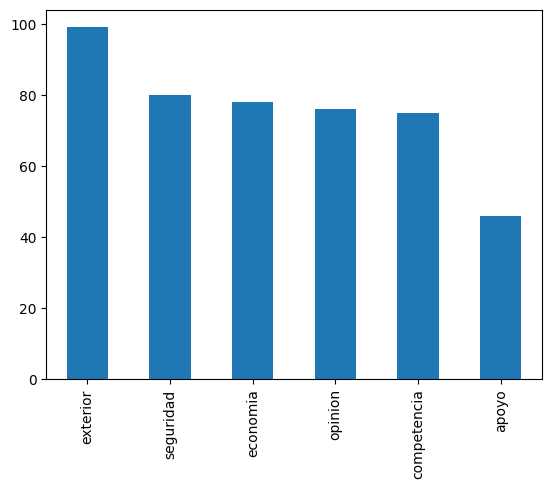

In [7]:
df['Clasificacion'].value_counts().plot(kind = 'bar')

In [8]:
tfidf = TfidfVectorizer()
vectorized_text = tfidf.fit_transform(df['Texto_limpio'])

In [9]:
from sklearn.manifold import TSNE
modelo = TSNE(n_components =2,  init = 'random')
resultado = modelo.fit_transform(vectorized_text)

In [10]:
tsne_result_df = pd.DataFrame({'tsne_1': resultado[:,0], 'tsne_2': resultado[:,1]})
tsne_result_df['label'] = df['Clasificacion']
tsne_result_df['text'] = df['Texto']
tsne_result_df.head()

,tsne_1,tsne_2,label,text
0,2.494910,17.236214,apoyo,También vamos a informar este primer día hábil...
1,1.636010,18.150177,apoyo,Y ahora se va a informar porque se está optand...
2,-8.321307,21.985022,apoyo,En esta etapa se combinan los bancos particula...
3,-5.392199,23.148401,apoyo,"También Ariadna Montiel, que es la secretaria ..."
4,-6.321781,21.654778,apoyo,Pero tenerlas terminadas no significa tenerlas...


In [12]:
import plotly.express as px
fig = px.scatter(data_frame = tsne_result_df,
                 x = tsne_result_df['tsne_1'],
                 y = tsne_result_df['tsne_2'],
                 color = tsne_result_df['label'],
                template = 'plotly_dark',
                hover_data = ['text'])
fig.show()